In [2]:
import numpy as np
import pickle
import keras
from keras import models, optimizers, layers, regularizers
from keras.models import model_from_json
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config = config)
import matplotlib.pyplot as plt

IMG_SIZE = 256

Using TensorFlow backend.


#### Define Useful Model Methods

In [3]:
# Save baseline model architecture and weights
def save_base(model_name):
    model_str = str(input("Save model as: "))

    # serialize model to JSON
    model_name = baseline.to_json()
    with open("CNN Models/" + model_str + ".json", "w") as json_file:
        json_file.write(model_name)

    # serialize weights to HDF5
    baseline.save_weights("CNN Models/" + model_str + ".h5")
    print("Saved " + model_str + " and weights to CNN Models folder")
    
# Save Comparison model
def save_model(model_name):
    model_str = str(input("Save model as: "))

    # serialize model to JSON
    model_name = model.to_json()
    with open("CNN Models/" + model_str + ".json", "w") as json_file:
        json_file.write(model_name)

    # serialize weights to HDF5
    model.save_weights("CNN Models/" + model_str + ".h5")
    print("Saved " + model_str + " and weights to CNN Models folder")
    
# Load model architecture and weights NOTE: must compile again
def load_model():
    model_str = str(input("Name of model to load: "))

    # load json and create model
    json_file = open('CNN Models/' + model_str + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("CNN Models/" + model_str + ".h5")
    print("Loaded " + model_str + " and weights from CNN Models folder")
    
    return loaded_model

# Write history object to a file using pickle
def save_history(model_name):
    hist_str = str(input("Save history as: "))

    pickle.dump(model_name.history, open('Training Histories/'+ hist_str + '.p', 'wb'))
    
    print("Saved " + hist_str + " to Training Histories folder")
    
# Load history object
def load_history():
    hist_str = str(input("Name of history to load: "))

    loaded_history = pickle.load(open('Training Histories/' + hist_str + '.p', 'rb'))
    
    print("Loaded " + hist_str + " from Training Histories folder")
    
    return loaded_history

###### Load Images & Labels

In [4]:
training_img_1 = pickle.load(open('training_img_1.p', 'rb'))
training_img_2 = pickle.load(open('training_img_2.p', 'rb'))
training_img = np.append(training_img_1, training_img_2, axis = 0)

test_img = pickle.load(open('pickle_test_img.p', 'rb'))

training_labels = pickle.load(open('training_labels.p', 'rb'))
test_labels = pickle.load(open('test_labels.p', 'rb'))

In [4]:
'''
print(training_img.shape, 
     training_labels.shape,
     test_img.shape,
     test_labels.shape)'''

'\nprint(training_img.shape, \n     training_labels.shape,\n     test_img.shape,\n     test_labels.shape)'

In [5]:
# Load baseline history
base_hist = load_history()

Name of history to load: base_history_20e
Loaded base_history_20e from Training Histories folder


# Comparison Model

In [12]:
''''''
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.SpatialDropout2D(0.5, data_format = 'channels_last'))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15, activation='sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 252, 252, 16)      2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 124, 124, 32)      4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 59, 59, 64)        18496     
__________

In [7]:
# Optional: load model architecture
#model = load_model()
#model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

"\nmodel = load_model()\nmodel.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])"

In [13]:
model_history = model.fit(training_img, training_labels, epochs = 20, validation_split = (1 / 9), batch_size = 256, verbose = 1)

Train on 89696 samples, validate on 11212 samples
Epoch 1/20
89696/89696 [==============================] - 209s 2ms/step - loss: 0.5410 - acc: 0.9145 - val_loss: 0.5046 - val_acc: 0.9214
Epoch 2/20
89696/89696 [==============================] - 204s 2ms/step - loss: 0.4770 - acc: 0.9258 - val_loss: 0.4717 - val_acc: 0.9191
Epoch 3/20
89696/89696 [==============================] - 206s 2ms/step - loss: 0.4447 - acc: 0.9268 - val_loss: 0.4439 - val_acc: 0.9228
Epoch 4/20
89696/89696 [==============================] - 210s 2ms/step - loss: 0.4186 - acc: 0.9272 - val_loss: 0.4179 - val_acc: 0.9243
Epoch 5/20
89696/89696 [==============================] - 204s 2ms/step - loss: 0.3974 - acc: 0.9276 - val_loss: 0.3985 - val_acc: 0.9239
Epoch 6/20
89696/89696 [==============================] - 204s 2ms/step - loss: 0.3800 - acc: 0.9279 - val_loss: 0.3850 - val_acc: 0.9235
Epoch 7/20
89696/89696 [==============================] - 205s 2ms/step - loss: 0.3659 - acc: 0.9281 - val_loss: 0.3718 - 

In [14]:
model_test = model.evaluate(test_img, test_labels)
print(model_test)

11212/11212 [==============================] - 10s 867us/step
[0.2929416619855253, 0.9338030767491831]


###### Save History

In [15]:
save_history(model_history)

Save history as: vanilla_reg_VGG
Saved vanilla_reg_VGG to Training Histories folder


In [ ]:
# Optional: save model architecture
#save_model(model)

In [11]:
# Optional: load model architecture
#model = load_model()
#model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#model_history = load_history()

#### Plot Results Compared To Baseline

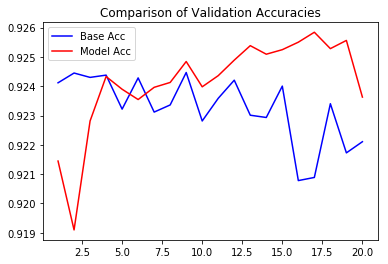

<Figure size 432x288 with 0 Axes>

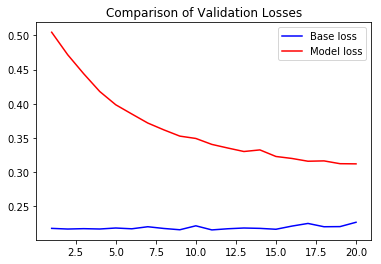

<Figure size 432x288 with 0 Axes>

In [16]:
base_acc = base_hist['val_acc']
model_acc = model_history.history['val_acc']
epochs = range(1, len(model_acc) + 1)
plt.plot(epochs, base_acc, 'b', label='Base Acc')
plt.plot(epochs, model_acc, 'r', label='Model Acc')
plt.title('Comparison of Validation Accuracies')
plt.legend()
plt.figure()

plt.show()
# Optional: save plot
#Todo

base_loss = base_hist['val_loss']
model_loss = model_history.history['val_loss']
plt.plot(epochs, base_loss, 'b', label='Base loss')
plt.plot(epochs, model_loss, 'r', label='Model loss')
plt.title('Comparison of Validation Losses')
plt.legend()
plt.figure()

# Optional: save plot
#Todo

plt.show()

### Compare Two Models

In [ ]:
# Optional: load model to see summary and/or compile for evaluation
#loaded_model = load_model()
#loaded_model.summary()

#loaded_model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])
#model_test = loaded_model.evaluate(test_img, test_labels)
#print(model_test)

In [ ]:
# Optional: load history to plot and compare models
loaded_hist =load_history()

#### Plot Validation Accuracies & Losses

In [ ]:
''''''
loaded_acc = loaded_hist['val_acc']
model_acc = model_history.history['val_acc']
epochs = range(1, len(model_acc) + 1)
plt.plot(epochs, loaded_acc, 'b', label='Loaded Model Acc')
plt.plot(epochs, model_acc, 'r', label='Trained Model Acc')
plt.title('Comparison of Validation Accuracies')
plt.legend()
plt.figure()

# Optional: save plot
#Todo

loaded_loss = loaded_hist['val_loss']
model_loss = model_history.history['val_loss']
plt.plot(epochs, loaded_loss, 'b', label='Loaded Model loss')
plt.plot(epochs, model_loss, 'r', label='Trained Model loss')
plt.title('Comparison of Validation Losses')
plt.legend()
plt.figure()

# Optional: save plot
#Todo

plt.show()